In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
plt.style.use('seaborn')

### Data Preparation

In [15]:
# i need 2 clusters
mean01 = np.array([1, 0.5])
cov01 = np.array([[1, 0.1], [0.1, 1.2]])

mean02 = np.array([4, 5])
cov02 = np.array([[1.2, 0.1], [0.1, 1.3]])
dist01 = np.random.multivariate_normal(mean01, cov01, 500)
dist02 = np.random.multivariate_normal(mean02, cov02, 500)
print(dist01.shape)

(500, 2)


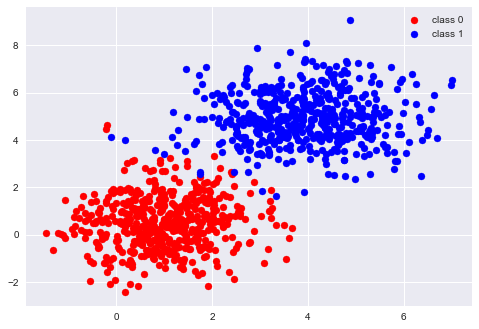

In [19]:
plt.scatter(dist01[:, 0], dist01[:, 1], color='red', label='class 0')
plt.scatter(dist02[:, 0], dist02[:, 1], color='blue', label='class 1')
plt.legend()
plt.show()

In [20]:
data = np.zeros((1000, 3))

In [23]:
# Combining the above generated data in a data matrix
data[:500, :2] = dist01
data[:500, 2] = 0.0
data[500:, :2] = dist02
data[500:, 2] = 1.0

In [25]:
# Randomly shuffling the data
np.random.shuffle(data)
print(data[:10])

[[ 0.78835074 -1.01398687  0.        ]
 [ 1.30165626  1.06259025  0.        ]
 [ 2.60215559  1.13566468  0.        ]
 [ 3.21372027  1.41011145  0.        ]
 [ 1.83970083 -0.47735448  0.        ]
 [ 3.29427608  3.81191851  1.        ]
 [ 3.98376287  5.32009383  1.        ]
 [ 4.36634471  6.37221064  1.        ]
 [-0.60814443 -0.91715933  0.        ]
 [ 3.90106892  5.49589009  1.        ]]


In [27]:
# Divide the data in train and test
split = int(0.8*data.shape[0])
X_train = data[:split, :-1]
y_train = data[:split, -1]
X_test = data[split:, :-1]
y_test = data[split:, -1]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(800, 2) (800,) (200, 2) (200,)
